## Bike Price prediction

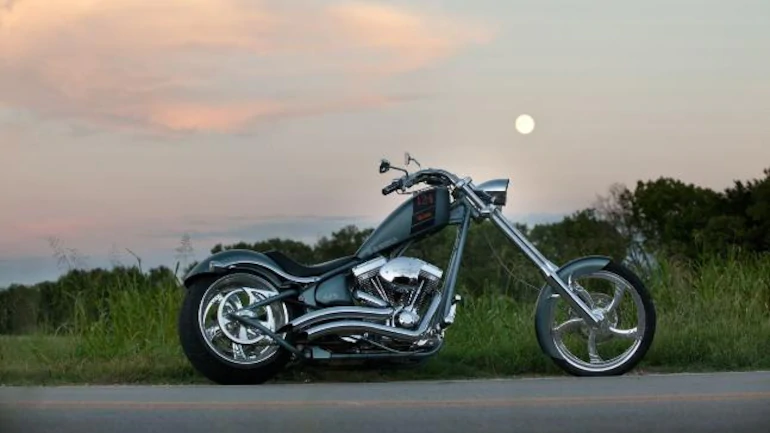

### About the dataset

### Got the data from a bike vendour website where it has a huge collection of different brands, and models around the world manufactured from 2010 to 2020. How does the factors or features effect in increase or decrease in the price. It has mainly focussed on the bikes engine, engine type, CC ,  and engine warranty. It is good to work on regression model to predict the price after feature engineering. Finding out the relations between each every factor is important. Does independent variable such as engine warranty, engine type, fuel type, CC, fuel capacity have an effect on Price? which one has more impact on increase and decrease in Price? Lets find out which feature has more importance.  The dataset contains the following columns:

1) Bike_company           -- The manufactured bike company

2) Bike_model             -- The model of the bike

3) Manufactured_year      -- The year of manufacturing

4) Engine_warranty        -- How many years of engine warranty

5) Engine_type            -- The type of an engine (eg: Boxer, Single)

6) Fuel_type              -- The type of fuel (eg: petrol, diesel or battery)

7) CC(Cubic capacity)     -- The CC of bike (eg: 150CC, 220CC)

8) Fuel_Capacity          -- The capacity of the fuel tank (eg: 10 litres, 20 litres)

9) Price                  -- Price of the bike

### Its an interesting way to work on regression model. Simple and easy way to learn and work on this dataset using simple methods. Lets go step by step more in detail about the data.

### Table of Contents
1) Import libraries & dataset

2) Exploratory Data analysis(EDA)

3) Preparing to modeling

4) Feature engineering

5) Validation techniques

6) Method-1: Get dummies

7) Method-2: Label encoding, cross-val score

8) Regularization techniques

9) Method-3: Variance inflation factor(VIF)

10) ML models

      i) Extra-tree regressor
      ii) Linear regression
      
12) MSE, MAE and RMSE

13) Conclusion


### 1) Import libraries

In [1]:
# Import the required libraries
# Library : In programming, a library is a collection of precompiled routines that a program can use. 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Import dataset

In [2]:
df=pd.read_excel(r'C:\Users\Sree\Documents\Bike_Price_Prediction.xlsx')  # To read excel file

In [3]:
df1=df.copy()   # copy() -- copied to df1 where the original content should not be missed out

In [4]:
df1.head()  # head() - method to show the first five rows of the dataset

,S.no,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,1,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220CC,10 Litres,113000
1,2,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120CC,11 Litres,70000
2,3,Hero,Passion,2020,5.0,Boxer,Petrol,140CC,12 Litres,85000
3,4,Honda,Activa 3G,2020,5.0,Single,Petrol,150CC,13 Litres,90000
4,5,Suzuki,Access,2020,5.0,V-twin,Petrol,350CC,14 Litres,65000


In [5]:
df1.columns    # to get the entire columns in the dataset

Index(['S.no', 'Bike_company', 'Bike_model', 'Manufactured_year',
       'Engine_warranty', 'Engine_type', 'Fuel_type', 'CC(Cubic capacity)',
       'Fuel_Capacity', 'Price'],
      dtype='object')

In [6]:
df1.info()  # to get the basic information of data such as dtypes,and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   S.no                308 non-null    int64  
 1   Bike_company        308 non-null    object 
 2   Bike_model          308 non-null    object 
 3   Manufactured_year   308 non-null    int64  
 4   Engine_warranty     306 non-null    float64
 5   Engine_type         308 non-null    object 
 6   Fuel_type           308 non-null    object 
 7   CC(Cubic capacity)  308 non-null    object 
 8   Fuel_Capacity       307 non-null    object 
 9   Price               308 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 24.2+ KB


In [7]:
df1.shape   # to get number of rows and columns

(308, 10)

In [8]:
df1.dtypes  # to get the data types 

S.no                    int64
Bike_company           object
Bike_model             object
Manufactured_year       int64
Engine_warranty       float64
Engine_type            object
Fuel_type              object
CC(Cubic capacity)     object
Fuel_Capacity          object
Price                   int64
dtype: object

In [9]:
df1.nunique()     # To see number of unique values(Features) in every individual columns

S.no                  307
Bike_company           25
Bike_model            237
Manufactured_year      14
Engine_warranty        13
Engine_type             6
Fuel_type               2
CC(Cubic capacity)     73
Fuel_Capacity          27
Price                 169
dtype: int64

In [10]:
df1.isna().sum()   # To check the missing values

S.no                  0
Bike_company          0
Bike_model            0
Manufactured_year     0
Engine_warranty       2
Engine_type           0
Fuel_type             0
CC(Cubic capacity)    0
Fuel_Capacity         1
Price                 0
dtype: int64

In [11]:
# From the above info we got to know that there are 2 nulls in Engine_warranty and 1 null in Fuel_capacity

In [12]:
# Lets go through each feature by value_counts()
# The value_counts() function is used to get a Series containing counts of unique values.
df1["Bike_company"].value_counts()

Yamaha                      20
Suzuki                      20
Hero                        19
Ducati                      19
Mahindra                    17
Honda                       16
KTM                         15
Triumph                     15
Kawasaki                    13
Lectro Electric             13
Banelli                     12
Bajaj                       12
BMW                         12
CFMoto                      11
Harley Davidson             11
Li-ion Elektrik Solution    11
Royal Enfield               10
Ather Energy                 9
Okinawa                      9
Revolt Motors                8
Bgauss                       8
TVS                          8
Jawa                         7
22Kymco                      7
Odysse                       6
Name: Bike_company, dtype: int64

In [13]:
df1['Bike_model'].value_counts()

Bullet                 6
Gixer                  5
Glamour                5
Fascino                5
Ninja                  5
                      ..
Zeppi                  1
XSL                    1
RoadStrapper           1
Triumph Thunderbold    1
Pluto                  1
Name: Bike_model, Length: 237, dtype: int64

In [14]:
df1['Engine_warranty'].value_counts()

5.0     81
3.0     43
4.0     43
6.0     35
8.0     28
10.0    28
12.0    20
2.0     14
7.0      9
9.0      2
14.0     1
13.0     1
50.0     1
Name: Engine_warranty, dtype: int64

In [15]:
df1['Manufactured_year'].value_counts()

2020    103
2019     56
2018     46
2017     42
2014     15
2016     13
2015      9
2012      8
2013      6
2011      6
1840      1
1790      1
202       1
2050      1
Name: Manufactured_year, dtype: int64

In [16]:
df1['Engine_type'].value_counts()

Boxer                 97
Single                81
V-twin                81
Two-Stroke            27
Dual Stroke           15
Oxidiser-Air inlet     7
Name: Engine_type, dtype: int64

In [17]:
df1['Fuel_type'].value_counts()

Petrol         258
Electricity     50
Name: Fuel_type, dtype: int64

In [18]:
df1['Fuel_Capacity'].value_counts()

Battery      40
19 Litres    31
17 Litres    26
18 Litres    25
20 Litres    25
22 Litres    22
15 Litres    21
16 Litres    19
25 Litres    16
21 Litres    16
23 Litres    14
24 Litres     8
26 Litres     7
12 Litres     6
14 Litres     5
11 Litres     5
13 Litres     4
27 Litres     4
10 Litres     3
28 Litres     2
29 Litres     2
31 Litres     1
32 Litres     1
30 Litres     1
33 Litres     1
34 Litres     1
35 Litres     1
Name: Fuel_Capacity, dtype: int64

In [19]:
df1['CC(Cubic capacity)'].value_counts()

150CC    25
125CC    21
250CC    17
350CC    16
155CC    12
         ..
167CC     1
380CC     1
750CC     1
649CC     1
525CC     1
Name: CC(Cubic capacity), Length: 73, dtype: int64

In [20]:
df1['Price'].value_counts()

65000      13
124500      6
790000      6
55000       5
350000      5
           ..
345000      1
190000      1
1200000     1
289000      1
81916       1
Name: Price, Length: 169, dtype: int64

In [24]:
# Pandas describe() is used to view some basic statistical details like percentile, mean, std etc.
df1.describe().drop('count').T

,mean,std,min,25%,50%,75%,max
S.no,154.496753,89.059088,1.0,77.75,154.5,231.25,308.0
Manufactured_year,2010.847403,104.747343,202.0,2017.00,2019.0,2020.00,2050.0
Engine_warranty,6.032680,3.719542,2.0,4.00,5.0,8.00,50.0
Price,254841.610390,295017.430251,50000.0,75000.00,104500.0,341250.00,1779990.0


In [25]:
# To print the how much percentage the nulls have in the total
total = df1.isnull().sum().sort_values(ascending = False)
percent = (df1.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Engine_warranty,2,0.649351
Fuel_Capacity,1,0.324675
Price,0,0.000000
CC(Cubic capacity),0,0.000000
Fuel_type,0,0.000000
Engine_type,0,0.000000
Manufactured_year,0,0.000000
Bike_model,0,0.000000
Bike_company,0,0.000000
S.no,0,0.000000


### 2) Exploratory data analysis(EDA)

In [26]:
df1= df1.drop('S.no',1)

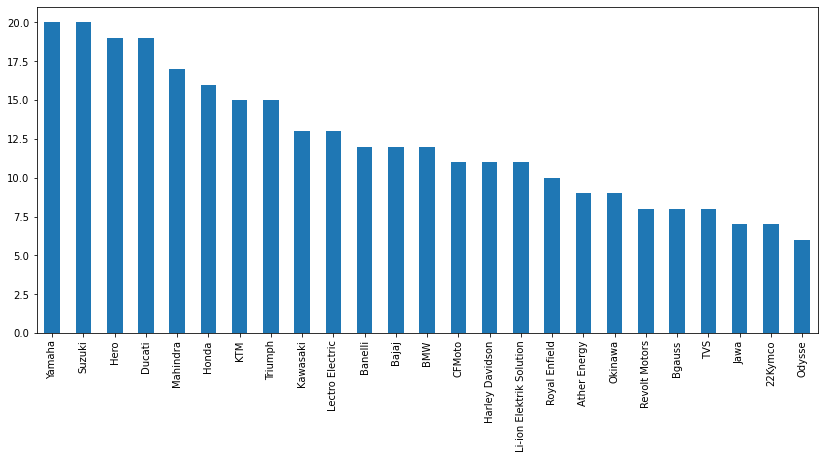

In [27]:
plt.figure(figsize=(14,6))
df1['Bike_company'].value_counts().plot.bar()

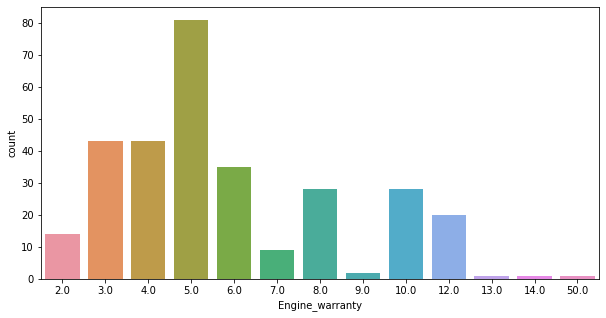

In [28]:
plt.figure(figsize=(10,5))

sns.countplot(x='Engine_warranty', data=df1)

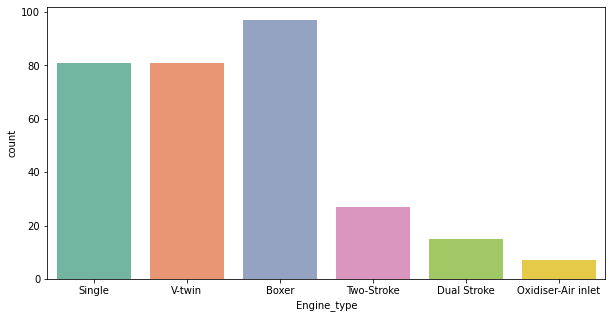

In [29]:
plt.figure(figsize=(10,5))

sns.countplot(x='Engine_type', data=df1, palette="Set2")

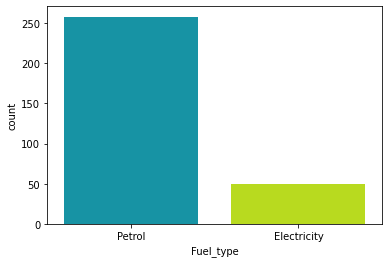

In [30]:
sns.countplot(x='Fuel_type', data=df1, palette='nipy_spectral')

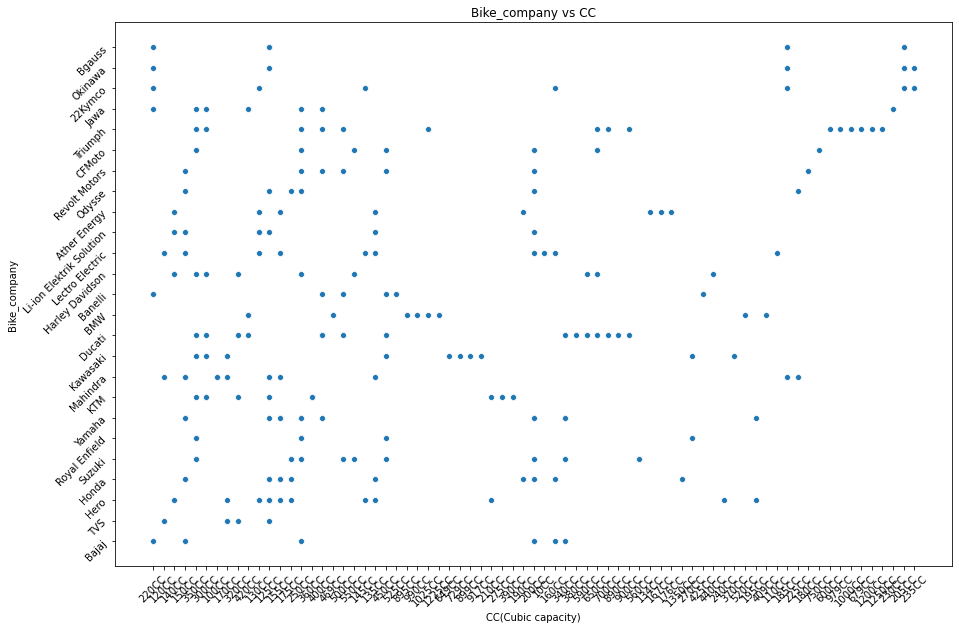

In [31]:
plt.figure(figsize=(15,10))

sns.scatterplot(x='CC(Cubic capacity)',y='Bike_company', data=df1)

plt.xticks(rotation= 45);
plt.yticks(rotation= 45);
plt.title('Bike_company vs CC');


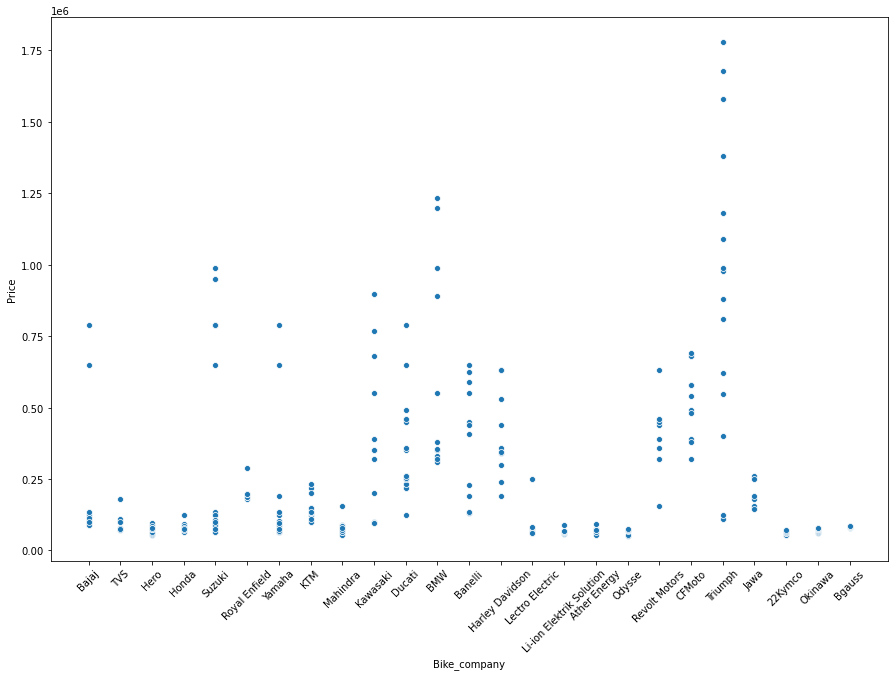

In [32]:
plt.figure(figsize=(15,10))

sns.scatterplot(x='Bike_company',y='Price', data=df1)
plt.xticks(rotation= 45);


Text(0, 0.5, 'Price(in millions)')

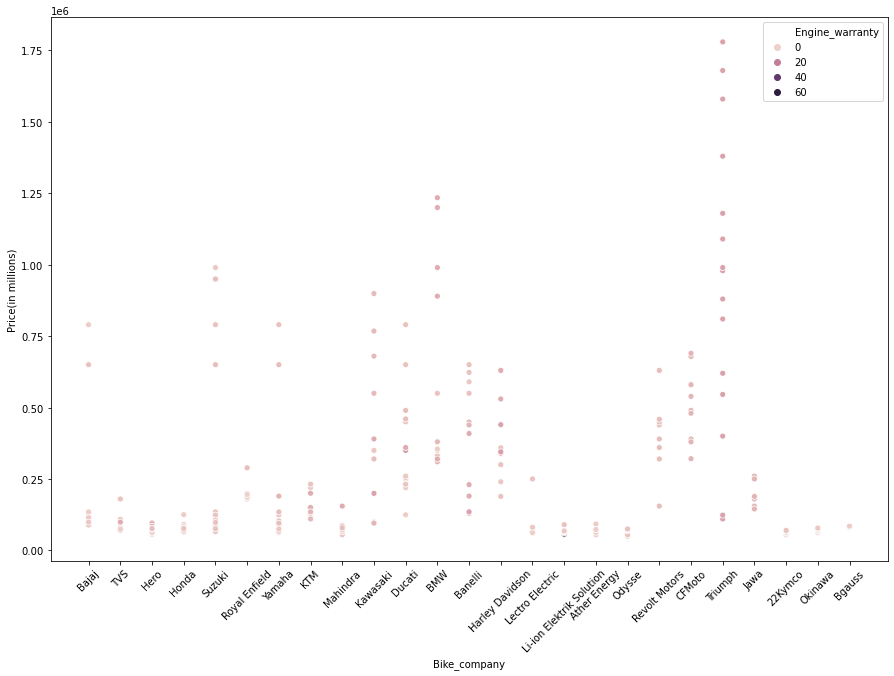

In [33]:
plt.figure(figsize=(15,10))

sns.scatterplot(x='Bike_company',y='Price',hue='Engine_warranty', data=df1)
plt.xticks(rotation= 45);
plt.ylabel('Price(in millions)')


Text(0, 0.5, 'Price(in millions)')

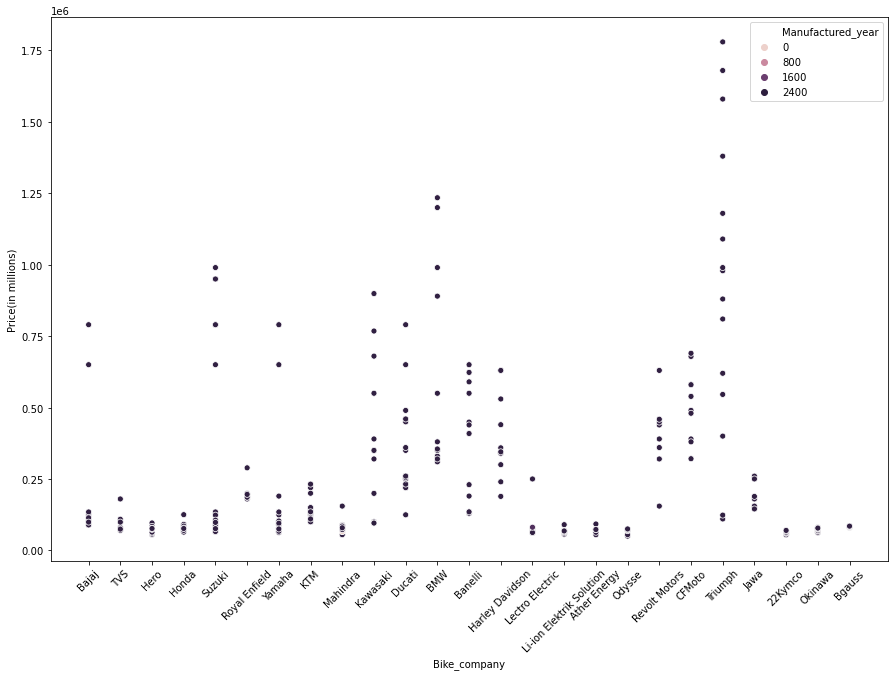

In [34]:
plt.figure(figsize=(15,10))

sns.scatterplot(x='Bike_company',y='Price',hue='Manufactured_year', data=df1)
plt.xticks(rotation= 45);
plt.ylabel('Price(in millions)')


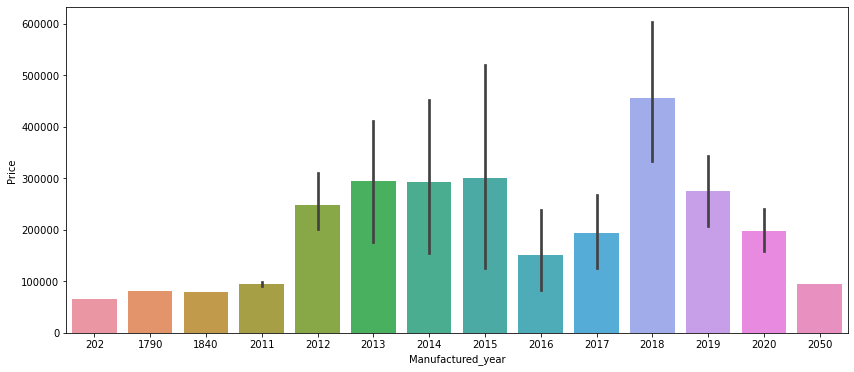

In [35]:
plt.figure(figsize=(14,6))
sns.barplot(x='Manufactured_year', y='Price', data=df1)

In [ ]:
# Need to change the object to int as we see in CC and Fuel_capacity
# Strip off CC from 130CC, 145CC
# Strip off litres from Fuel_capacity as we only work on numerical variable

In [37]:
df1['CC(Cubic capacity)'] = df1['CC(Cubic capacity)'].str.strip('CC')

In [38]:
df1.head()

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220,10 Litres,113000
1,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120,11 Litres,70000
2,Hero,Passion,2020,5.0,Boxer,Petrol,140,12 Litres,85000
3,Honda,Activa 3G,2020,5.0,Single,Petrol,150,13 Litres,90000
4,Suzuki,Access,2020,5.0,V-twin,Petrol,350,14 Litres,65000


In [39]:
df1['CC(Cubic capacity)'].dtypes

dtype('O')

In [40]:
# As CC is in Object. We need to convert it to int by astype('int64')
df1['CC(Cubic capacity)']=df1['CC(Cubic capacity)'].astype('int64')

In [41]:
df1['CC(Cubic capacity)'].dtypes

dtype('int64')

In [42]:
df1['Fuel_Capacity']=df1['Fuel_Capacity'].str.strip('Litres')

In [43]:
df1.head()

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220,10,113000
1,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120,11,70000
2,Hero,Passion,2020,5.0,Boxer,Petrol,140,12,85000
3,Honda,Activa 3G,2020,5.0,Single,Petrol,150,13,90000
4,Suzuki,Access,2020,5.0,V-twin,Petrol,350,14,65000


In [44]:
df1['Fuel_Capacity'].dtypes

dtype('O')

In [46]:
# We know that Fuel_capacity has 1 null value
df1['Fuel_Capacity'].isna().sum()

1

In [49]:
# As there are electric bikes as well where Fuel_capacity has Battery. Need to replace them by 1
df1['Fuel_Capacity']=df1['Fuel_Capacity'].replace('Battery', 1)

In [47]:
# How do we fill nulls?
# We can fill nulls by imputation, by replace() function, by mean, median , and mode else we can drop the nulls.
# As the data is small in size we will fill the nulls by median. 

In [50]:
df1['Fuel_Capacity']= df1['Fuel_Capacity'].fillna(df1['Fuel_Capacity'].median(), axis=0)

In [51]:
df1['Fuel_Capacity'].isna().sum()

0

In [67]:
df1['Fuel_Capacity'].dtypes

dtype('O')

In [68]:
df1['Fuel_Capacity']=df1['Fuel_Capacity'].astype('int64')

In [52]:
df_null=df1.iloc[20:26]
df_null

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
20,Honda,Shine,2016,10.0,V-twin,Petrol,155,18,79999
21,Suzuki,Gixer,2011,2.0,V-twin,Petrol,175,19,87999
22,Royal Enfield,Bullet,2012,2.0,V-twin,Petrol,250,20,185999
23,Yamaha,FZ-S,2013,4.0,Boxer,Petrol,155,15,90000
24,KTM,Duke,2014,NaN,Boxer,Petrol,360,16,99999
25,Mahindra,Mojo,2015,5.0,Boxer,Petrol,125,17,55000


In [53]:
# 24th row has NaN value in Engine_warranty
# Inorder to get it we can use iloc to go read particular row using index location(iloc)

In [54]:
df1.iloc[24]  # to get the full details of particular row using iloc[]

Bike_company             KTM
Bike_model              Duke
Manufactured_year       2014
Engine_warranty          NaN
Engine_type            Boxer
Fuel_type             Petrol
CC(Cubic capacity)       360
Fuel_Capacity            16 
Price                  99999
Name: 24, dtype: object

In [55]:
df1['Engine_warranty']= df1['Engine_warranty'].fillna(df1['Engine_warranty'].median(), axis=0)
# df1['Engine_warranty'] = [6 if i>15 else i for i in df1['Engine_warranty']] 
# Mean can also used to fill nulls

In [66]:
df1['Engine_warranty'].mean()

6.025974025974026

In [56]:
df1.iloc[24]

Bike_company             KTM
Bike_model              Duke
Manufactured_year       2014
Engine_warranty            5
Engine_type            Boxer
Fuel_type             Petrol
CC(Cubic capacity)       360
Fuel_Capacity            16 
Price                  99999
Name: 24, dtype: object

In [ ]:
# Null values have been filled using median

In [57]:
df['Manufactured_year'].value_counts()

2020    103
2019     56
2018     46
2017     42
2014     15
2016     13
2015      9
2012      8
2013      6
2011      6
1840      1
1790      1
202       1
2050      1
Name: Manufactured_year, dtype: int64

In [58]:
# From Manufacured_year it is observed that 2025, 1990, 1890, and 202 are outliers.

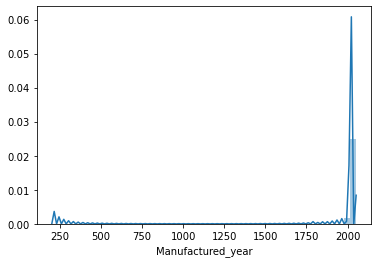

In [60]:
sns.distplot(df1['Manufactured_year'])

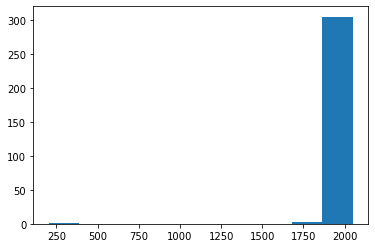

In [62]:
plt.hist(df1['Manufactured_year']);

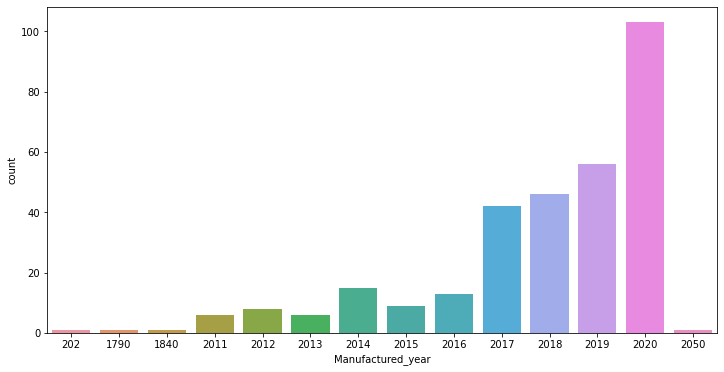

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(df['Manufactured_year'], data=df1)

In [69]:
df_outliers= df1[(df1['Manufactured_year']<2011) | (df1['Manufactured_year']>2020)]
df_outliers

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
33,Lectro Electric,Neon,1840,2.0,Single,Electricity,145,1,79000
199,Mahindra,Gusto,202,3.0,Boxer,Petrol,120,18,66000
200,Kawasaki,Ninja Kaboom,2050,8.0,Single,Petrol,370,19,95599
214,Lectro Electric,Cyclone,1790,4.0,Single,Electricity,155,1,81000


In [64]:
# From the above figures we found that there are few outliers such as year 202, 1790, 1840, and 2050

In [73]:
df1['Manufactured_year'].median()

2019.0

In [70]:
df1['Manufactured_year']=df1['Manufactured_year'].replace({202: 2019, 1840: 2019, 1790: 2019, 2050: 2019})
# Replacing the outliers by median
# df1['Manufactured_year']=[df1['Manufactured_year'].median() if (i<2011 | i>2020) else i for i in df1['Manufactured_year']] 

In [77]:
df1['Manufactured_year'].value_counts()

2020    103
2019     60
2018     46
2017     42
2014     15
2016     13
2015      9
2012      8
2013      6
2011      6
Name: Manufactured_year, dtype: int64

In [78]:
df1['Fuel_type'].value_counts()

Petrol         258
Electricity     50
Name: Fuel_type, dtype: int64

In [79]:
df2= df1.copy()

In [80]:
df2.head()

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220,10,113000
1,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120,11,70000
2,Hero,Passion,2020,5.0,Boxer,Petrol,140,12,85000
3,Honda,Activa 3G,2020,5.0,Single,Petrol,150,13,90000
4,Suzuki,Access,2020,5.0,V-twin,Petrol,350,14,65000


In [81]:
df2['Fuel_type']= df2['Fuel_type'].replace({'Petrol':1, 'Electricity': 0})

In [82]:
df3= df2.copy()

In [84]:
df3= df3.drop(['Bike_company', 'Bike_model'],1)

In [85]:
df3.head()

,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,2020,5.0,Single,1,220,10,113000
1,2020,5.0,V-twin,1,120,11,70000
2,2020,5.0,Boxer,1,140,12,85000
3,2020,5.0,Single,1,150,13,90000
4,2020,5.0,V-twin,1,350,14,65000


## Method-1: Get dummies

In [86]:
df4= pd.get_dummies(df3)

In [87]:
df4.head()

,Manufactured_year,Engine_warranty,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price,Engine_type_Boxer,Engine_type_Dual Stroke,Engine_type_Oxidiser-Air inlet,Engine_type_Single,Engine_type_Two-Stroke,Engine_type_V-twin
0,2020,5.0,1,220,10,113000,0,0,0,1,0,0
1,2020,5.0,1,120,11,70000,0,0,0,0,0,1
2,2020,5.0,1,140,12,85000,1,0,0,0,0,0
3,2020,5.0,1,150,13,90000,0,0,0,1,0,0
4,2020,5.0,1,350,14,65000,0,0,0,0,0,1


In [88]:
df4= df4.drop('Engine_type_Boxer',1)
# We drop one column inorder to overcome dummy variable trap

In [89]:
df4.corr()

,Manufactured_year,Engine_warranty,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price,Engine_type_Dual Stroke,Engine_type_Oxidiser-Air inlet,Engine_type_Single,Engine_type_Two-Stroke,Engine_type_V-twin
Manufactured_year,1.000000,-0.008326,-0.197638,0.027240,-0.154682,-0.017973,0.002884,0.134984,0.014048,0.094092,-0.188614
Engine_warranty,-0.008326,1.000000,0.129128,0.309472,0.172087,0.337686,0.365095,0.081310,-0.077892,-0.120010,0.051583
Fuel_type,-0.197638,0.129128,1.000000,0.295294,0.797421,0.274626,0.099606,0.067134,-0.117005,-0.206003,0.062983
CC(Cubic capacity),0.027240,0.309472,0.295294,1.000000,0.400862,0.746504,0.424258,0.005553,0.004308,-0.100074,-0.090873
Fuel_Capacity,-0.154682,0.172087,0.797421,0.400862,1.000000,0.440226,0.199778,0.118023,-0.053573,-0.081914,0.021908
Price,-0.017973,0.337686,0.274626,0.746504,0.440226,1.000000,0.528800,-0.033646,-0.092502,0.004770,-0.110248
Engine_type_Dual Stroke,0.002884,0.365095,0.099606,0.424258,0.199778,0.528800,1.000000,-0.034505,-0.135158,-0.070136,-0.135158
Engine_type_Oxidiser-Air inlet,0.134984,0.081310,0.067134,0.005553,0.118023,-0.033646,-0.034505,1.000000,-0.091095,-0.047271,-0.091095
Engine_type_Single,0.014048,-0.077892,-0.117005,0.004308,-0.053573,-0.092502,-0.135158,-0.091095,1.000000,-0.185165,-0.356828
Engine_type_Two-Stroke,0.094092,-0.120010,-0.206003,-0.100074,-0.081914,0.004770,-0.070136,-0.047271,-0.185165,1.000000,-0.185165


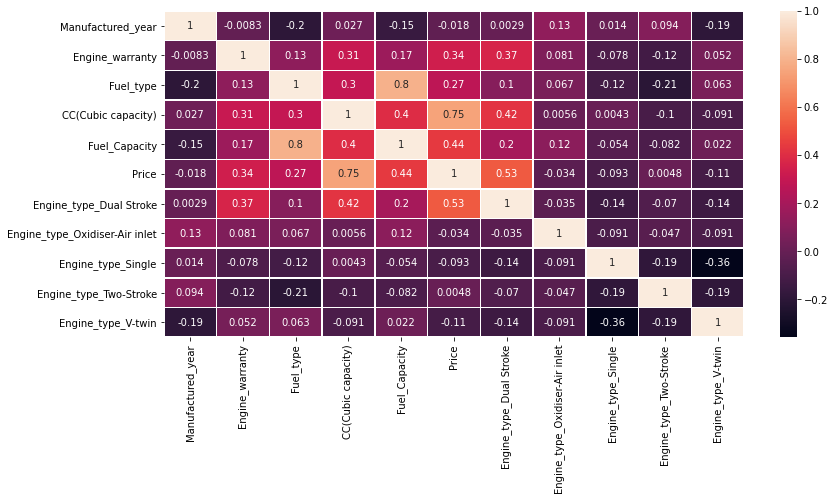

In [90]:
plt.figure(figsize=(13,6))
sns.heatmap(df4.corr(), annot=True, linewidths=0.5)

In [ ]:
# From the above figure it is observed that Fuel_type and Fuel_capacity has highest correlation i.e., 0.8
# CC and Price are also correlated to each other as the CC increases, Price also increases i.e., 0.75
# Engine_type_Dual Stroke and Price also correlated to each other i.e., 0.53

In [91]:
X=df4.drop('Price',1)
y=df4['Price']

####        ExtraTreesRegressor: An extra-trees regressor. This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [92]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [93]:
print(model.feature_importances_)

[0.04362109 0.04648053 0.01177116 0.49912773 0.12136029 0.23002462
 0.00399853 0.01021803 0.01900146 0.01439656]


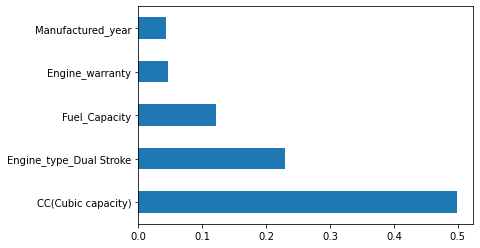

In [94]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

####  train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [96]:
et =ExtraTreesRegressor()
et.fit(X_train, y_train)

ExtraTreesRegressor()

In [97]:
et =ExtraTreesRegressor()
et.fit(X_train, y_train)
predict= et.predict(X_test)


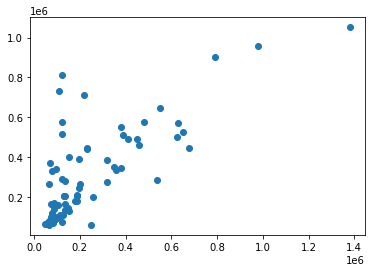

In [98]:
plt.scatter(y_test,predict)


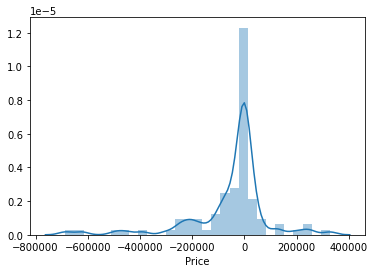

In [99]:
sns.distplot(y_test-predict)

In [100]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predict))
print('MSE:', metrics.mean_squared_error(y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MAE: 87782.59150537633
MSE: 25793472455.566296
RMSE: 160603.46339841583


### R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model.

###     cross_val_score: It takes the features df and target y, splits into k-folds (which is the cv parameter), fits on the (k-1) folds and evaluates on the last fold. It does this k times, which is why you get k values in the output array.

In [101]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [102]:
cv=5        # CV value
r_2 = []    # List for r_2 score
CV = []     # list for CV scores mean

# Main function for models
def model(algorithm,X_train,y_train,X_test,y_test): 
    algorithm.fit(X_train,y_train)
    predicts=algorithm.predict(X_test)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test,prediction)
    cross_val=cross_val_score(algorithm,X_train,y_train,cv=cv)
    
    # Appending results to Lists 
    r_2.append(R_2)
    CV.append(cross_val.mean())
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    test_index=y_test.reset_index()["Price"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

LinearRegression() 

r_2 score : 0.5360480522127652 

CV scores: [0.44045866 0.15781752 0.69027267 0.62467283 0.69331549] 

CV scores mean: 0.521307434915811


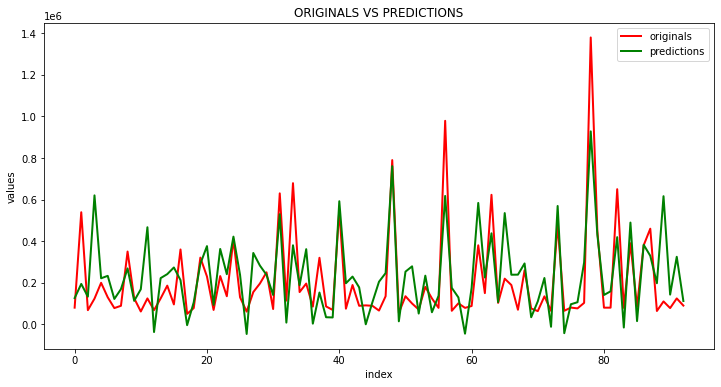

In [103]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,X_train,y_train,X_test,y_test)

### Regularization techniques

### Ridge and Lasso Regression: L1 and L2 Regularization : Ridge and Lasso regression are some of the simple techniques to reduce model complexity, multi-collinearity and prevent over-fitting which may result from simple linear regression.

In [104]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3,3,num=14) # range for alpha

grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.5220972086766927
345.5107294592218


Lasso(alpha=345.5107294592218, normalize=True) 

r_2 score : 0.5571019618072274 

CV scores: [0.42455234 0.22077913 0.68960665 0.60844703 0.70410945] 

CV scores mean: 0.5294989177171557


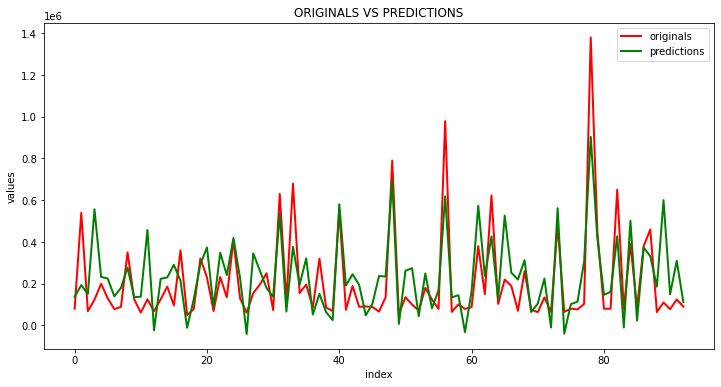

In [105]:
ls = Lasso(alpha = grid.best_estimator_.alpha, normalize = True) # applied the best estimator
model(ls,X_train,y_train,X_test,y_test)

In [106]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-3,3,num=14) # range for alpha

grid2 = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas)) 
grid2.fit(X_train, y_train)

print(grid2.best_score_)
print(grid2.best_estimator_.alpha)

0.5428054713851849
1000.0


Ridge(alpha=0.01, normalize=True) 

r_2 score : 0.5403050992508072 

CV scores: [0.44396383 0.15550927 0.6913564  0.62449866 0.69439884] 

CV scores mean: 0.5219454005140239


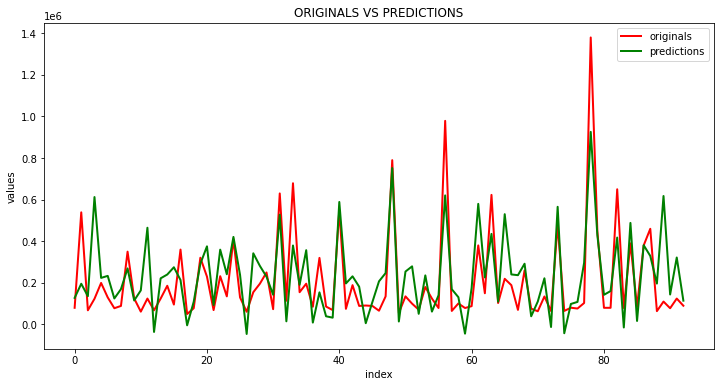

In [107]:
ridge = Ridge(alpha = 0.01, normalize = True) # applied the best estimator
model(ridge,X_train,y_train,X_test,y_test)

In [133]:
df1.head()

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,Bajaj,Avenger 220,2020,5.0,Single,Petrol,220,10,113000
1,TVS,Apache RTR,2020,5.0,V-twin,Petrol,120,11,70000
2,Hero,Passion,2020,5.0,Boxer,Petrol,140,12,85000
3,Honda,Activa 3G,2020,5.0,Single,Petrol,150,13,90000
4,Suzuki,Access,2020,5.0,V-twin,Petrol,350,14,65000


## Method-2 : Label encoding, and cross val score

In [135]:
df2.head()

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,Bajaj,Avenger 220,2020,5.0,Single,1,220,10,113000
1,TVS,Apache RTR,2020,5.0,V-twin,1,120,11,70000
2,Hero,Passion,2020,5.0,Boxer,1,140,12,85000
3,Honda,Activa 3G,2020,5.0,Single,1,150,13,90000
4,Suzuki,Access,2020,5.0,V-twin,1,350,14,65000


In [136]:
df_M2 = df2.copy()   # M2- Method-2

In [137]:
df_M2.head()

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,Bajaj,Avenger 220,2020,5.0,Single,1,220,10,113000
1,TVS,Apache RTR,2020,5.0,V-twin,1,120,11,70000
2,Hero,Passion,2020,5.0,Boxer,1,140,12,85000
3,Honda,Activa 3G,2020,5.0,Single,1,150,13,90000
4,Suzuki,Access,2020,5.0,V-twin,1,350,14,65000


### LabelEncoder:  Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form for categorical variable.

In [138]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [139]:
df_M2['Bike_company']= le.fit_transform(df_M2['Bike_company'])
df_M2['Bike_model']= le.fit_transform(df_M2['Bike_model'])
df_M2['Engine_type']= le.fit_transform(df_M2['Engine_type'])

In [140]:
df_M2.head()

,Bike_company,Bike_model,Manufactured_year,Engine_warranty,Engine_type,Fuel_type,CC(Cubic capacity),Fuel_Capacity,Price
0,3,18,2020,5.0,3,1,220,10,113000
1,22,13,2020,5.0,5,1,120,11,70000
2,9,156,2020,5.0,0,1,140,12,85000
3,10,9,2020,5.0,3,1,150,13,90000
4,21,6,2020,5.0,5,1,350,14,65000


In [141]:
X= df_M2.drop('Price',1)
y= df_M2['Price']

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

In [143]:
et =ExtraTreesRegressor()
et.fit(X_train, y_train)
predict= et.predict(X_test)


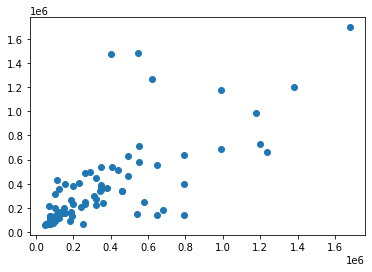

In [144]:
plt.scatter(y_test,predict)


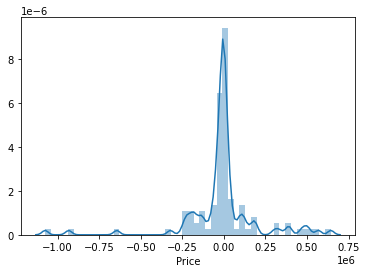

In [145]:
sns.distplot(y_test-predict)

In [146]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [147]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [148]:
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

# Main function for models
def model(algorithm,X_train,y_train,X_test,y_test): 
    algorithm.fit(X_train,y_train)
    predicts=algorithm.predict(X_test)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test,prediction)
    cross_val=cross_val_score(algorithm,X_train,y_train,cv=cv)
    
    # Appending results to Lists 
    r_2.append(R_2)
    CV.append(cross_val.mean())
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    test_index=y_test.reset_index()["Price"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

LinearRegression() 

r_2 score : 0.6409227722141426 

CV scores: [ 0.55319157  0.19783398 -0.10128621  0.56847611  0.49563311] 

CV scores mean: 0.3427697102852063


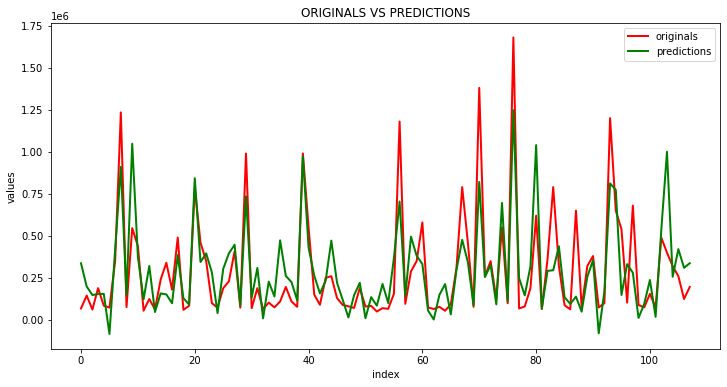

In [149]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,X_train,y_train,X_test,y_test)

In [150]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3,3,num=14) # range for alpha

grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.34575607099208383
1000.0


Lasso(alpha=1000.0, normalize=True) 

r_2 score : 0.657835183699367 

CV scores: [ 0.46595429  0.46537447 -0.13943373  0.55871485  0.45440769] 

CV scores mean: 0.36100351242676376


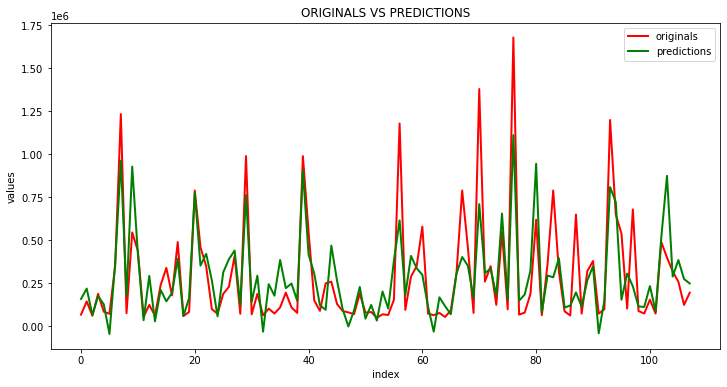

In [151]:
ls = Lasso(alpha = grid.best_estimator_.alpha, normalize = True) # applied the best estimator
model(ls,X_train,y_train,X_test,y_test)

In [152]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-3,3,num=14) # range for alpha

grid2 = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas)) 
grid2.fit(X_train, y_train)

print(grid2.best_score_)
print(grid2.best_estimator_.alpha)

0.4106932965560247
1000.0


Ridge(alpha=0.01, normalize=True) 

r_2 score : 0.6431296110154987 

CV scores: [ 0.54918493  0.2297136  -0.09040281  0.57148881  0.49152518] 

CV scores mean: 0.3503019413115601


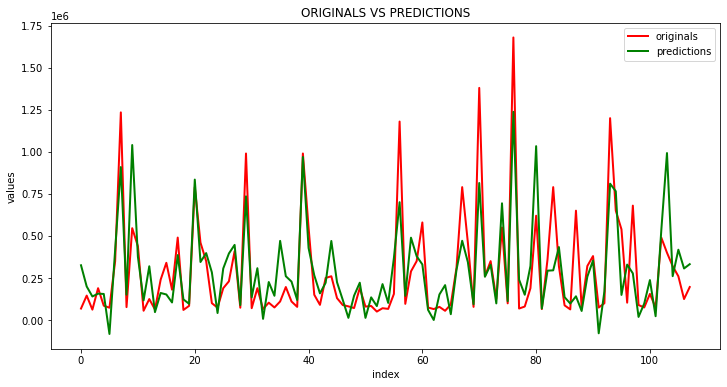

In [153]:
ridge = Ridge(alpha = 0.01, normalize = True) # applied the best estimator
model(ridge,X_train,y_train,X_test,y_test)


## Method-3 : Variance inflation factor

# What is a Variance Inflation Factor?
A variance inflation factor(VIF) detects multicollinearity in regression analysis. Multicollinearity is when there’s correlation between predictors (i.e. independent variables) in a model; it’s presence can adversely affect your regression results. The VIF estimates how much the variance of a regression coefficient is inflated due to multicollinearity in the model.

VIFs are usually calculated by software, as part of regression analysis. You’ll see a VIF column as part of the output. VIFs are calculated by taking a predictor, and regressing it against every other predictor in the model. This gives you the R-squared values, which can then be plugged into the VIF formula. “i” is the predictor you’re looking at (e.g. x1 or x2):
variance inflation factor.

# Interpreting the Variance Inflation Factor
Variance inflation factors range from 1 upwards. The numerical value for VIF tells you (in decimal form) what percentage the variance (i.e. the standard error squared) is inflated for each coefficient. For example, a VIF of 1.9 tells you that the variance of a particular coefficient is 90% bigger than what you would expect if there was no multicollinearity — if there was no correlation with other predictors.
A rule of thumb for interpreting the variance inflation factor:

1 = not correlated.
Between 1 and 5 = moderately correlated.
Greater than 5 = highly correlated.
Exactly how large a VIF has to be before it causes issues is a subject of debate. What is known is that the more your VIF increases, the less reliable your regression results are going to be. In general, a VIF above 10 indicates high correlation and is cause for concern. Some authors suggest a more conservative level of 2.5 or above.

Sometimes a high VIF is no cause for concern at all. For example, you can get a high VIF by including products or powers from other variables in your regression, like x and x2. If you have high VIFs for dummy variables representing nominal variables with three or more categories, those are usually not a problem.

### Recursive Feature Elimination, or RFE for short, is a popular feature selection algorithm.

RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

In [154]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [155]:
lm= LinearRegression()
lm.fit(X_train, y_train)

rfe= RFE(lm,10)
rfe = rfe.fit(X_train, y_train)

D:\conda\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [156]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Bike_company', True, 1),
 ('Bike_model', True, 1),
 ('Manufactured_year', True, 1),
 ('Engine_warranty', True, 1),
 ('Engine_type', True, 1),
 ('Fuel_type', True, 1),
 ('CC(Cubic capacity)', True, 1),
 ('Fuel_Capacity', True, 1)]

In [157]:
col = X_train.columns[rfe.support_]
col

Index(['Bike_company', 'Bike_model', 'Manufactured_year', 'Engine_warranty',
       'Engine_type', 'Fuel_type', 'CC(Cubic capacity)', 'Fuel_Capacity'],
      dtype='object')

## Ordinary least squares
In statistics, ordinary least squares (OLS) is a type of linear least squares method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given dataset and those predicted by the linear function.

### Difference between Linear regression and OLS
Linear regression refers to any approach to model a LINEAR relationship between one or more variables. Linear regression CAN be done using OLS as can other NON-LINEAR (and hence not linear regression) models. OLS is a optimization method frequently applied when performing linear regression. However it is not the only method and others can be utilized to linear regression same as OLS is also used for NONlinear models.

In [158]:
X_train_rfe = X_train[col]
import statsmodels.api as sm
X_train_rfe= sm.add_constant(X_train_rfe)
model = sm.OLS(y_train,X_train_rfe).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     34.69
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           1.99e-33
Time:                        23:42:11   Log-Likelihood:                -2702.1
No. Observations:                 200   AIC:                             5422.
Df Residuals:                     191   BIC:                             5452.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.373e+07   1.14e+07      1.208      0.228   -8.69e+06    3.61e+07
Bike_company        4409.7121   1933.709      2.280      0.024     595.544    8223.880
Bike_model           404.7115    212.126      1.908      0.058     -13.698     823.121
Manufactured_year  -6899.2880   5628.272     -1.226      0.222    -1.8e+04    4202.264
Engine_warranty     7557.4315   3296.531      2.293      0.023    1055.150    1.41e+04
Engine_type        -1.349e+04   6730.835     -2.004      0.046   -2.68e+04    -212.741
Fuel_type          -2.042e+05   6.61e+04     -3.090      0.002   -3.35e+05   -7.39e+04
CC(Cubic capacity)   819.9204     73.889     11.097      0.000     674.178     965.663
Fuel_Capacity        1.51e+04   3220.325      4.690      0.000    8750.697    2.15e+04
==============================================================================
Omnibus:                       44.810   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.874
Skew:                           0.605   Prob(JB):                     5.65e-65
Kurtosis:                       8.834   Cond. No.                     1.80e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [159]:
X_train_rfe = X_train[col]
import statsmodels.api as sm


In [160]:
X_train_rfe= sm.add_constant(X_train_rfe)
model = sm.OLS(y_train,X_train_rfe).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     34.69
Date:                Fri, 20 Nov 2020   Prob (F-statistic):           1.99e-33
Time:                        23:51:45   Log-Likelihood:                -2702.1
No. Observations:                 200   AIC:                             5422.
Df Residuals:                     191   BIC:                             5452.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.373e+07   1.14e+07      1.208      0.228   -8.69e+06    3.61e+07
Bike_company        4409.7121   1933.709      2.280      0.024     595.544    8223.880
Bike_model           404.7115    212.126      1.908      0.058     -13.698     823.121
Manufactured_year  -6899.2880   5628.272     -1.226      0.222    -1.8e+04    4202.264
Engine_warranty     7557.4315   3296.531      2.293      0.023    1055.150    1.41e+04
Engine_type        -1.349e+04   6730.835     -2.004      0.046   -2.68e+04    -212.741
Fuel_type          -2.042e+05   6.61e+04     -3.090      0.002   -3.35e+05   -7.39e+04
CC(Cubic capacity)   819.9204     73.889     11.097      0.000     674.178     965.663
Fuel_Capacity        1.51e+04   3220.325      4.690      0.000    8750.697    2.15e+04
==============================================================================
Omnibus:                       44.810   Durbin-Watson:                   2.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.874
Skew:                           0.605   Prob(JB):                     5.65e-65
Kurtosis:                       8.834   Cond. No.                     1.80e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Probability value(P-value)
P > 0.05 is the probability that the null hypothesis is true. ... A statistically significant test result (P ≤ 0.05) means that the test hypothesis is false or should be rejected. A P value greater than 0.05 means that no effect was observed.

In [161]:
# Dropping the "Manufactured_year" variable which has p-value>0.05 resulting in insigificant.

X_train1= X_train_rfe.drop('Manufactured_year' ,axis=1)

In [162]:
X_train2= sm.add_constant(X_train1)
model1= sm.OLS(y_train,X_train2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     39.33
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           6.33e-34
Time:                        00:09:58   Log-Likelihood:                -2702.9
No. Observations:                 200   AIC:                             5422.
Df Residuals:                     192   BIC:                             5448.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.007e+05   5.42e+04     -3.700      0.000   -3.08e+05   -9.37e+04
Bike_company        4264.8415   1932.619      2.207      0.029     452.950    8076.733
Bike_model           416.2055    212.195      1.961      0.051      -2.328     834.739
Engine_warranty     7612.9228   3300.532      2.307      0.022    1102.966    1.41e+04
Engine_type         -1.23e+04   6669.198     -1.844      0.067   -2.55e+04     855.044
Fuel_type          -1.979e+05    6.6e+04     -3.000      0.003   -3.28e+05   -6.78e+04
CC(Cubic capacity)   808.8417     73.430     11.015      0.000     664.009     953.674
Fuel_Capacity       1.541e+04   3214.921      4.792      0.000    9066.203    2.17e+04
==============================================================================
Omnibus:                       44.239   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.855
Skew:                           0.580   Prob(JB):                     4.68e-66
Kurtosis:                       8.896   Cond. No.                     1.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [163]:
# Dropping the "Bike_company" variable which has p-value>0.05 resulting in insigificant.

X_train3= X_train2.drop('Bike_company',axis=1)

In [164]:
X_train4= sm.add_constant(X_train3)
model1= sm.OLS(y_train,X_train2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     39.33
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           6.33e-34
Time:                        00:10:48   Log-Likelihood:                -2702.9
No. Observations:                 200   AIC:                             5422.
Df Residuals:                     192   BIC:                             5448.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.007e+05   5.42e+04     -3.700      0.000   -3.08e+05   -9.37e+04
Bike_company        4264.8415   1932.619      2.207      0.029     452.950    8076.733
Bike_model           416.2055    212.195      1.961      0.051      -2.328     834.739
Engine_warranty     7612.9228   3300.532      2.307      0.022    1102.966    1.41e+04
Engine_type         -1.23e+04   6669.198     -1.844      0.067   -2.55e+04     855.044
Fuel_type          -1.979e+05    6.6e+04     -3.000      0.003   -3.28e+05   -6.78e+04
CC(Cubic capacity)   808.8417     73.430     11.015      0.000     664.009     953.674
Fuel_Capacity       1.541e+04   3214.921      4.792      0.000    9066.203    2.17e+04
==============================================================================
Omnibus:                       44.239   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.855
Skew:                           0.580   Prob(JB):                     4.68e-66
Kurtosis:                       8.896   Cond. No.                     1.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [165]:
# Dropping the "Bike_model" variable which has p-value>0.05 resulting in insigificant.

X_train5= X_train4.drop('Bike_model',axis=1)

In [166]:
X_train6= sm.add_constant(X_train5)
model1= sm.OLS(y_train,X_train5).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     50.81
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           1.73e-33
Time:                        00:11:10   Log-Likelihood:                -2708.2
No. Observations:                 200   AIC:                             5428.
Df Residuals:                     194   BIC:                             5448.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -9.452e+04   4.38e+04     -2.159      0.032   -1.81e+05   -8162.654
Engine_warranty     8996.9702   3337.632      2.696      0.008    2414.266    1.56e+04
Engine_type        -1.409e+04   6786.789     -2.076      0.039   -2.75e+04    -705.221
Fuel_type          -2.176e+05   6.48e+04     -3.361      0.001   -3.45e+05   -8.99e+04
CC(Cubic capacity)   784.0320     74.526     10.520      0.000     637.047     931.017
Fuel_Capacity       1.646e+04   3217.361      5.116      0.000    1.01e+04    2.28e+04
==============================================================================
Omnibus:                       52.862   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.756
Skew:                           0.767   Prob(JB):                     1.03e-79
Kurtosis:                       9.426   Cond. No.                     1.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [167]:
# Dropping the "Engine_type" variable which has p-value>0.05 resulting in insigificant.

X_train7= X_train6.drop('Engine_type',axis=1)

In [168]:
X_train8= sm.add_constant(X_train7)
model1= sm.OLS(y_train,X_train7).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     61.39
Date:                Sat, 21 Nov 2020   Prob (F-statistic):           1.70e-33
Time:                        00:11:29   Log-Likelihood:                -2710.4
No. Observations:                 200   AIC:                             5431.
Df Residuals:                     195   BIC:                             5447.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.376e+05   3.89e+04     -3.538      0.001   -2.14e+05   -6.09e+04
Engine_warranty     8943.8994   3365.746      2.657      0.009    2305.962    1.56e+04
Fuel_type          -1.935e+05   6.42e+04     -3.012      0.003    -3.2e+05   -6.68e+04
CC(Cubic capacity)   792.8725     75.033     10.567      0.000     644.892     940.853
Fuel_Capacity        1.54e+04   3203.196      4.807      0.000    9079.570    2.17e+04
==============================================================================
Omnibus:                       54.880   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              404.422
Skew:                           0.785   Prob(JB):                     1.52e-88
Kurtosis:                       9.787   Cond. No.                     1.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [171]:
X_train_new = X_train7.drop('const',1)

In [172]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Fuel_Capacity,19.92
1,Fuel_type,17.29
2,CC(Cubic capacity),3.71
0,Engine_warranty,2.64


In [173]:
y_train_pred = model1.predict(X_train8)


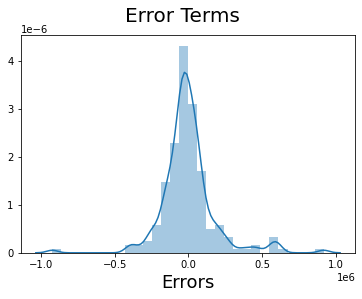

In [174]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 30)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18);

In [175]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df_M2, test_size = 0.3, random_state = 100)

In [176]:

y_test = df_test.pop('Price')
X_test = df_test
# Predicting the values by extracting the columns that our final model had

X_test_pred= X_test[X_train_new.columns]

X_test_pred= sm.add_constant(X_test_pred)
y_pred= model1.predict(X_test_pred)


Text(0, 0.5, 'y_pred')

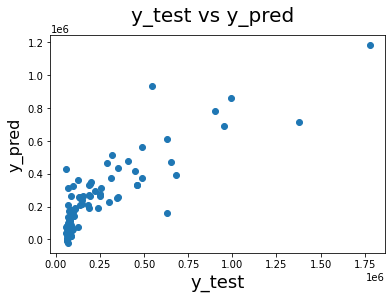

In [177]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

In [178]:
df = pd.DataFrame({'Actual':y_test,"Predicted":y_pred})
df.head(10)

,Actual,Predicted
75,56700,428075.063497
7,150000,213252.797454
154,195999,262028.572870
56,145000,239621.762142
217,79099,54365.304790
189,350000,435083.374149
305,83416,165772.361203
166,255000,311076.623724
136,66000,206705.646164
249,678999,389809.228002


In [179]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2

0.7159134255725429

## Conclusion:                                                                                                                                    
We observed that the algorithms and regularization techniques worked well. We have been through few methods to know about the data. We also observed the difference between actual and predicted values. We have learnt few statistical analysis, correlation, and validation techniques for feature engineering

In [181]:
## Please do upvote to learn and execute more!!!
## Any questions, feel free to drop it.